In [12]:
import pandas as pd
import os
import sys

sys.path.append('/home/../multiTS/NFT/')

from lists import Stations

def clean_and_save_pickle(input_dir, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # List to keep track of files with missing columns
    bad_files = []

    # Iterate over each file in the input directory
    for file in os.listdir(input_dir):
        if file.endswith('.pkl'):
            file_path = os.path.join(input_dir, file)
            df = pd.read_pickle(file_path)

            # Check if all required columns are present
            required_columns = ['TMIN', 'TMAX', 'TAVG']
            if not all(col in df.columns for col in required_columns):
                bad_files.append(file)
                continue

            # Keep only specified columns
            df = df[required_columns]

            # Impute missing data
            # Here, we use the mean for imputation, but you can choose another method
            df = df.fillna(df.mean())

            # Save the cleaned and imputed data to a new CSV file in the output directory
            output_file_path = os.path.join(output_dir, file)
            df.to_pickle(output_file_path)

    return bad_files

for station in Stations:
    input_directory  = f'/home/../multiTS/NFT/data/noaa/noaa_ghcn/years/original/{station}/'
    output_directory = f'/home/../multiTS/NFT/data/noaa/noaa_ghcn/years/embedded/{station}/'
    if not os.path.exists(output_directory): os.makedirs(output_directory)

    bad_files = clean_and_save_pickle(input_directory, output_directory)


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sys
models_path = "/home/../multiTS"
if models_path not in sys.path: sys.path.append(models_path)
from NFT.data.proccess_data_functions import plot_df


df = pd.read_pickle('/home/../multiTS/NFT/data/noaa/noaa_ghcn/noaa_pkl/noaa_AE000041196_1955.pkl')


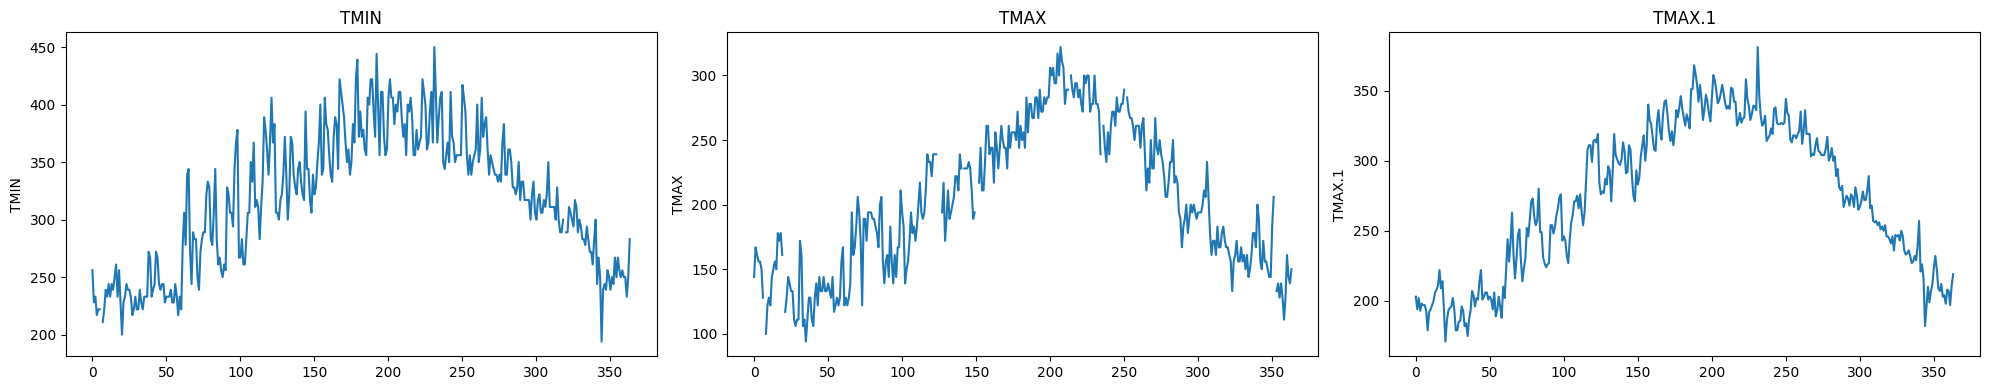

In [2]:
plot_df(df)